In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [73]:
%run ../cow.py
%run ../optimize_pkg.py

In [72]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
tx_SNR_range = arange(5, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
user_range = arange(2, 36, 1)

In [26]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"
extension = ".in"

# Optimize 1

6.85


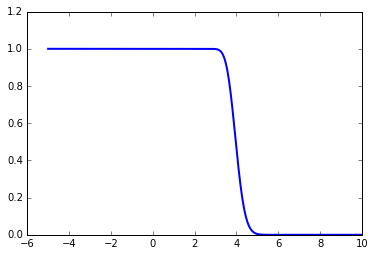

In [23]:
N = 35
downTable = load_table(filepath_down+str(N)+extension)
plot(downTable[0], downTable[1], lw=2.0)
print downTable[0][np.where(np.array(downTable[1])<=10**(-10))[0][0]]

In [34]:
%%time
optimize_1_data = zeros((34, 5))
for N in user_range:
    optimize_1_data[N-2] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 14min 9s, sys: 7.42 s, total: 14min 16s
Wall time: 14min 13s


[[ -6.00000000e-02   4.73300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  3.40000000e-01   3.36800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  7.10000000e-01   2.68600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.03000000e+00   2.27700000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.33000000e+00   2.00600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.55000000e+00   1.81000000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.90000000e+00   1.67800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.11000000e+00   1.56700000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.44000000e+00   1.49200000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.68000000e+00   1.42600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.98000000e+00   1.38000000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  3.1100

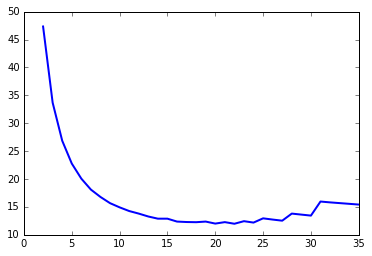

In [35]:
print optimize_1_data
plot(range(2, 36), optimize_1_data[:,1], lw=2.0)

# Optimize 2

In [40]:
%%time
optimize_2_data = zeros((34, 5))
for N in user_range:
    optimize_2_data[N-2] = optimize_2(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

IndexError: index 34 is out of bounds for axis 0 with size 34

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   4.73900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  3.00000000e-01   3.36400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  6.00000000e-01   2.67500000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.00000000e+00   2.27400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.20000000e+00   1.99300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.50000000e+00   1.80500000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.80000000e+00   1.66800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.00000000e+00   1.55600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.30000000e+00   1.47800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.60000000e+00   1.41800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.8000

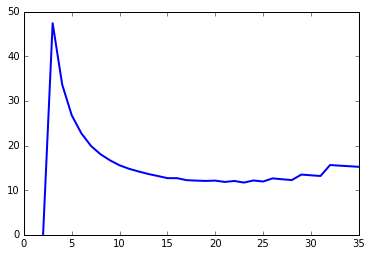

In [41]:
print optimize_2_data
plot(range(2, 36), optimize_2_data[:,1], lw=2.0)

In [43]:
%%time
optimize_2_35 = optimize_2(35, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 10min 51s, sys: 5.48 s, total: 10min 57s
Wall time: 10min 54s


In [44]:
optimize_2_data2 = np.vstack((optimize_2_data[1:,:], optimize_2_35))

In [75]:
optimize_2_data2[0] = optimize_2(2, rx_SNR_range, arange(47, -10*log10(protocol_target), 0.01), filepath_down, filepath_up, protocolbit)

[[ -1.00000000e-01   4.72900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  3.00000000e-01   3.36400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  6.00000000e-01   2.67500000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.00000000e+00   2.27400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.20000000e+00   1.99300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.50000000e+00   1.80500000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.80000000e+00   1.66800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.00000000e+00   1.55600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.30000000e+00   1.47800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.60000000e+00   1.41800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.80000000e+00   1.36200000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  3.0000

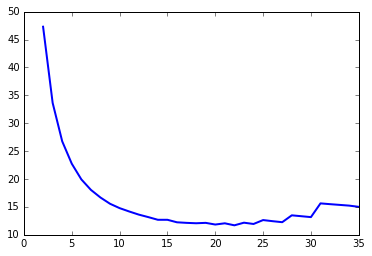

In [76]:
print optimize_2_data2
print optimize_2_data2.shape
plot(user_range, optimize_2_data2[:,1], lw=2.0)

# Optimize 3

In [47]:
%%time
optimize_3_data = zeros((34, 5))
for N in user_range:
    optimize_3_data[N-2] = optimize_3(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    
print optimize_3_data

[[  0.00000000e+00   4.73900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  0.00000000e+00   3.33400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  0.00000000e+00   2.61700000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  0.00000000e+00   2.18800000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.00000000e-01   1.90100000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  2.00000000e-01   1.69100000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  4.00000000e-01   1.54300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  5.00000000e-01   1.41900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  7.00000000e-01   1.33100000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  8.00000000e-01   1.25300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  9.00000000e-01   1.19200000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  9.0000

# Optimize 4

Done heuristically in other ipynb

In [61]:
%%time
optimize_filepath_down = "../data_tables/optimize_down/n"
optimize_filepath_up = "../data_tables/optimize_up/n"
tx_SNR_range = arange(10, 60, 0.01)

CPU times: user 153 µs, sys: 76 µs, total: 229 µs
Wall time: 178 µs


In [62]:
%%time
N = 35
optimize_4_35 = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit)
print optimize_4_35

(10.5, 15.009999999999893, 9844.0, 9800.0, 20356.0)
CPU times: user 24min 29s, sys: 7.53 s, total: 24min 36s
Wall time: 47min 14s


In [63]:
optimize_4_data = zeros((34, 5))
optimize_4_data[0] = [-0.50000000000000011, 46.889999999999922, 9772, 16728, 13500]
optimize_4_data[1] = [-0.30000000000000016, 33.039999999999992, 8526, 18408, 13066]
optimize_4_data[2] = [-2.2204460492503131e-16, 26.150000000000023, 7315, 17050, 15635]
optimize_4_data[3] = [0.20000000000000001, 21.940000000000037, 6904, 17740, 15356]
optimize_4_data[4] = [0.40000000000000002, 19.13000000000002, 6660, 17450, 15890]
optimize_4_data[5] = [0.60000000000000009, 17.150000000000023, 6440, 17160, 16400]
optimize_4_data[6] = [0.80000000000000004, 15.679999999999996, 6270, 16810, 16920]
optimize_4_data[7] = [1.0, 14.559999999999995, 6245, 16675, 17080]
optimize_4_data[8] = [1.2000000000000002, 13.679999999999996, 6256, 16480, 17264]
optimize_4_data[9] = [1.4000000000000001, 12.979999999999993, 6116, 16190, 17694]
optimize_4_data[10] = [1.6000000000000001, 12.419999999999995, 6132, 15636, 18232]
optimize_4_data[11] = [1.8, 11.969999999999994, 6180, 15324, 18496]
optimize_4_data[12] = [1.9000000000000001, 11.489999999999993, 6461, 15899, 17640]
optimize_4_data[13] = [2.2000000000000002, 11.289999999999994, 6288, 15220, 18492]
optimize_4_data[14] = [2.3000000000000003, 10.939999999999994, 6460, 15480, 18060]
optimize_4_data[15] = [2.5, 10.739999999999995, 6632, 15056, 18312]
optimize_4_data[16] = [2.8000000000000003, 10.669999999999996, 6624, 14346, 19030]
optimize_4_data[17] = [2.9000000000000004, 10.439999999999994, 6808, 14341, 18851]
optimize_4_data[18] = [3.1000000000000001, 10.339999999999996, 6920, 14224, 18856]
optimize_4_data[19] = [3.3000000000000003, 10.259999999999994, 7110, 14080, 18810]
optimize_4_data[20] = [3.6000000000000001, 10.299999999999995, 7224, 13760, 19016]
optimize_4_data[21] = [3.8000000000000003, 10.269999999999994, 7363, 13398, 19239]
optimize_4_data[22] = [4.2000000000000002, 10.439999999999998, 7435, 12960, 19605]
optimize_4_data[23] = [4.6000000000000005, 10.639999999999997, 7600, 12400, 20000]
optimize_4_data[24] = [5.0, 10.839999999999993, 7712, 11762, 20526]
optimize_4_data[25] = [5.0, 10.659999999999997, 8040, 12216, 19744]
optimize_4_data[26] = [5.7000000000000002, 11.189999999999996, 8141, 11495, 20364]
optimize_4_data[27] = [6.6000000000000005, 11.929999999999991, 8305, 10636, 21059]
optimize_4_data[28] = [6.6000000000000005, 11.769999999999994, 8592, 10992, 20416]
optimize_4_data[29] = [8.0, 13.029999999999999, 8784, 10032, 21184]
optimize_4_data[30] = [8.0, 12.889999999999992, 9060, 10340, 20600]
optimize_4_data[31] = [8.0, 12.759999999999994, 9330, 10665, 20005]
optimize_4_data[32] = [10.5, 15.129999999999784, 9565.0, 9520.0, 20915.0]
optimize_4_data[33] = [10.5, 15.009999999999893, 9844.0, 9800.0, 20356.0]

print optimize_4_data

[[ -5.00000000e-01   4.68900000e+01   9.77200000e+03   1.67280000e+04
    1.35000000e+04]
 [ -3.00000000e-01   3.30400000e+01   8.52600000e+03   1.84080000e+04
    1.30660000e+04]
 [ -2.22044605e-16   2.61500000e+01   7.31500000e+03   1.70500000e+04
    1.56350000e+04]
 [  2.00000000e-01   2.19400000e+01   6.90400000e+03   1.77400000e+04
    1.53560000e+04]
 [  4.00000000e-01   1.91300000e+01   6.66000000e+03   1.74500000e+04
    1.58900000e+04]
 [  6.00000000e-01   1.71500000e+01   6.44000000e+03   1.71600000e+04
    1.64000000e+04]
 [  8.00000000e-01   1.56800000e+01   6.27000000e+03   1.68100000e+04
    1.69200000e+04]
 [  1.00000000e+00   1.45600000e+01   6.24500000e+03   1.66750000e+04
    1.70800000e+04]
 [  1.20000000e+00   1.36800000e+01   6.25600000e+03   1.64800000e+04
    1.72640000e+04]
 [  1.40000000e+00   1.29800000e+01   6.11600000e+03   1.61900000e+04
    1.76940000e+04]
 [  1.60000000e+00   1.24200000e+01   6.13200000e+03   1.56360000e+04
    1.82320000e+04]
 [  1.8000

# Optimize 5

Done heuristically in other ipynb

In [66]:
optimize_5_data = zeros((34, 5))
optimize_5_data[0] = (-0.70000000000000007, 46.789999999999985, 11088, 18796, 10116)
optimize_5_data[1] = (-0.60000000000000009, 32.809999999999995, 8709, 17310, 13981)
optimize_5_data[2] = (-0.40000000000000013, 25.760000000000009, 8023, 17050, 14927)
optimize_5_data[3] = (-0.40000000000000013, 21.390000000000015, 8108, 17740, 14152)
optimize_5_data[4] = (-0.20000000000000018, 18.560000000000009, 7490, 16952, 15558)
optimize_5_data[5] = (-0.30000000000000016, 16.420000000000002, 8360, 17480, 14160)
optimize_5_data[6] = (-0.1000000000000002, 14.899999999999999, 7975, 16190, 15835)
optimize_5_data[7] = (-2.2204460492503131e-16, 13.639999999999999, 8033, 16377, 15590)
optimize_5_data[8] = (0.099999999999999645, 12.649999999999999, 8272, 16912, 14816)
optimize_5_data[9] = (0.29999999999999982, 11.94, 7910, 15776, 16314)
optimize_5_data[10] = (0.39999999999999969, 11.269999999999998, 7980, 15636, 16384)
optimize_5_data[11] = (0.49999999999999956, 10.709999999999999, 8212, 15959, 15829)
optimize_5_data[12] = (0.59999999999999964, 10.229999999999999, 8276, 15899, 15825)
optimize_5_data[13] = (0.7999999999999996, 9.9199999999999999, 8028, 15220, 16752)
optimize_5_data[14] = (0.49999999999999956, 9.4499999999999993, 9210, 15480, 15310)
optimize_5_data[15] = (0.69999999999999973, 9.2199999999999989, 8920, 15056, 16024)
optimize_5_data[16] = (0.7999999999999996, 8.9299999999999997, 9000, 14346, 16654)
optimize_5_data[17] = (0.89999999999999947, 8.6799999999999979, 9226, 14341, 16433)
optimize_5_data[18] = (0.99999999999999956, 8.4599999999999991, 9296, 14224, 16480)
optimize_5_data[19] = (1.1999999999999993, 8.3699999999999992, 9078, 14080, 16842)
optimize_5_data[20] = (1.2999999999999994, 8.1999999999999975, 9276, 13760, 16964)
optimize_5_data[21] = (1.4999999999999996, 8.1499999999999986, 9138, 13398, 17464)
optimize_5_data[22] = (1.6999999999999993, 8.1199999999999992, 9125, 12960, 17915)
optimize_5_data[23] = (1.8999999999999995, 8.0999999999999979, 9160, 12400, 18440)
optimize_5_data[24] = (2.1999999999999993, 8.1999999999999957, 9008, 11762, 19230)
optimize_5_data[25] = (2.1999999999999993, 8.0099999999999998, 9288, 12216, 18496)
optimize_5_data[26] = (2.5999999999999992, 8.2399999999999984, 9130, 11495, 19375)
optimize_5_data[27] = (3.1999999999999993, 8.6699999999999964, 8897, 10636, 20467)
optimize_5_data[28] = (3.1999999999999993, 8.5099999999999998, 9200, 10992, 19808)
optimize_5_data[29] = (3.9999999999999991, 9.1599999999999984, 9070, 10032, 20898)
optimize_5_data[30] = (3.9999999999999991, 9.0199999999999996, 9400, 10340, 20260)
optimize_5_data[31] = (3.9999999999999991, 8.879999999999999, 9675, 10665, 19660)
optimize_5_data[32] = (4.1999999999999993, 10.319999999999997, 9781, 9520, 20699)
optimize_5_data[33] = (4.1999999999999993, 10.159999999999998, 10056, 9800, 20144)
print optimize_5_data

[[ -7.00000000e-01   4.67900000e+01   1.10880000e+04   1.87960000e+04
    1.01160000e+04]
 [ -6.00000000e-01   3.28100000e+01   8.70900000e+03   1.73100000e+04
    1.39810000e+04]
 [ -4.00000000e-01   2.57600000e+01   8.02300000e+03   1.70500000e+04
    1.49270000e+04]
 [ -4.00000000e-01   2.13900000e+01   8.10800000e+03   1.77400000e+04
    1.41520000e+04]
 [ -2.00000000e-01   1.85600000e+01   7.49000000e+03   1.69520000e+04
    1.55580000e+04]
 [ -3.00000000e-01   1.64200000e+01   8.36000000e+03   1.74800000e+04
    1.41600000e+04]
 [ -1.00000000e-01   1.49000000e+01   7.97500000e+03   1.61900000e+04
    1.58350000e+04]
 [ -2.22044605e-16   1.36400000e+01   8.03300000e+03   1.63770000e+04
    1.55900000e+04]
 [  1.00000000e-01   1.26500000e+01   8.27200000e+03   1.69120000e+04
    1.48160000e+04]
 [  3.00000000e-01   1.19400000e+01   7.91000000e+03   1.57760000e+04
    1.63140000e+04]
 [  4.00000000e-01   1.12700000e+01   7.98000000e+03   1.56360000e+04
    1.63840000e+04]
 [  5.0000

# Plots

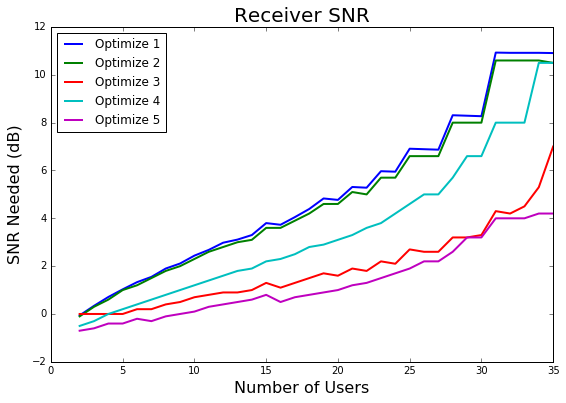

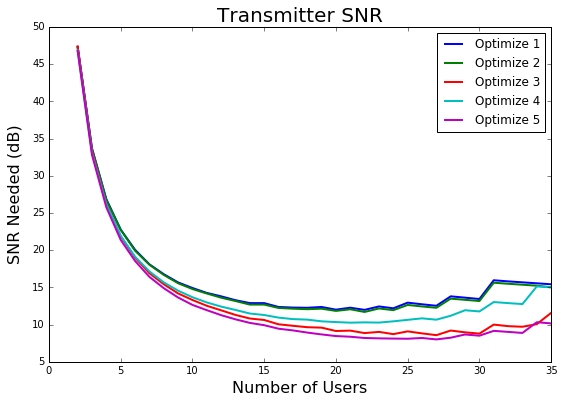

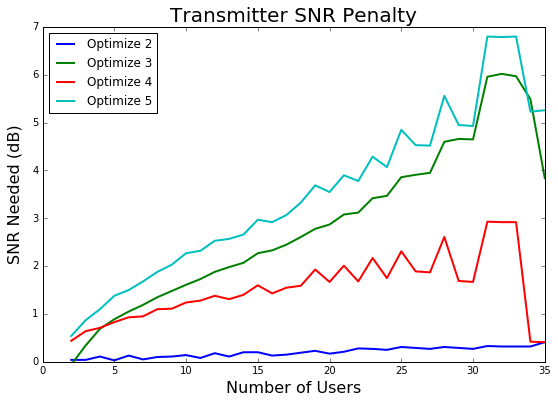

In [80]:
figure(figsize=(9, 6))
plot(user_range, optimize_1_data[:, 0], lw=2.0, label='Optimize 1')
plot(user_range, optimize_2_data2[:, 0], lw=2.0, label='Optimize 2')
plot(user_range, optimize_3_data[:, 0], lw=2.0, label='Optimize 3')
plot(user_range, optimize_4_data[:, 0], lw=2.0, label='Optimize 4')
plot(user_range, optimize_5_data[:, 0], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Receiver SNR', fontsize=20)
savefig('optimization_receiver.pdf', bbox='tight')

figure(figsize=(9, 6))
# plot(user_range, shannon_prediction, lw=2.0, label='Shannon Prediction')
plot(user_range, optimize_1_data[:, 1], lw=2.0, label='Optimize 1')
plot(user_range, optimize_2_data2[:, 1], lw=2.0, label='Optimize 2')
plot(user_range, optimize_3_data[:, 1], lw=2.0, label='Optimize 3')
plot(user_range, optimize_4_data[:, 1], lw=2.0, label='Optimize 4')
plot(user_range, optimize_5_data[:, 1], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR', fontsize=20)
savefig('optimization_transmitter.pdf', bbox='tight')

figure(figsize=(9, 6))
plot(user_range, optimize_1_data[:, 1]-optimize_2_data2[:, 1], lw=2.0, label='Optimize 2')
plot(user_range, optimize_1_data[:, 1]-optimize_3_data[:, 1], lw=2.0, label='Optimize 3')
plot(user_range, optimize_1_data[:, 1]-optimize_4_data[:, 1], lw=2.0, label='Optimize 4')
plot(user_range, optimize_1_data[:, 1]-optimize_5_data[:, 1], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR Penalty', fontsize=20)
ylim([0, 7])
savefig('optimization_transmitter_penalty.pdf', bbox='tight')

In [59]:
print optimize_1_data[33, 1]
print optimize_2_data2[33, 1]
print optimize_3_data[33, 1]

15.42
15.01
11.58


In [65]:
print optimize_3_data[:,1]

[ 47.39  33.34  26.17  21.88  19.01  16.91  15.43  14.19  13.31  12.53
  11.92  11.3   10.82  10.62  10.04   9.84   9.65   9.59   9.14   9.19
   8.86   9.02   8.72   9.09   8.82   8.58   9.2    8.96   8.79  10.     9.79
   9.71  10.06  11.58]


In [81]:
print optimize_1_data[:, 1]-optimize_2_data2[:, 1]
print optimize_1_data[:, 1]-optimize_5_data[:, 1]

[ 0.04  0.04  0.11  0.03  0.13  0.05  0.1   0.11  0.14  0.08  0.18  0.11
  0.2   0.2   0.13  0.15  0.19  0.23  0.17  0.21  0.28  0.27  0.25  0.31
  0.29  0.27  0.31  0.29  0.27  0.33  0.32  0.32  0.32  0.41]
[ 0.54  0.87  1.1   1.38  1.5   1.68  1.88  2.03  2.27  2.32  2.53  2.57
  2.66  2.97  2.92  3.07  3.33  3.69  3.55  3.9   3.78  4.29  4.07  4.85
  4.53  4.52  5.56  4.95  4.93  6.8   6.79  6.8   5.23  5.26]
